In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Label'], axis=1),
    df['Label'],
    test_size=0.3,
    random_state=0)

In [19]:
# RandomForestClassifier segun link obtenida atraves de la profesora.
rf1 = RandomForestClassifier(n_estimators = 100)
#sel = SelectFromModel(rf1)
#sel.fit(X_train, y_train)
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True])

In [6]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

3

In [7]:
print(selected_feat)

Index(['DER_mass_MMC', 'Weight', 'KaggleWeight'], dtype='object')


In [8]:
pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

SyntaxError: invalid syntax (Temp/ipykernel_21004/226929636.py, line 1)

In [20]:
print(rf1.feature_importances_) #buscar feature_importance en selectfromModel

[4.62347040e-02 2.75161736e-02 1.00418290e-02 2.10221308e-03
 6.37395313e-03 4.55256326e-03 7.42715286e-04 3.42215658e-03
 8.18836064e-04 2.13952542e-03 8.55198305e-03 9.34889941e-03
 3.20334165e-03 1.19140741e-02 3.92177182e-04 2.93365709e-04
 1.23703830e-03 4.63700701e-04 3.78056120e-04 1.89398657e-03
 3.60943942e-04 1.34263431e-03 6.36272221e-04 1.91880007e-03
 1.16396000e-03 7.93587468e-04 1.95184174e-04 2.30687751e-04
 2.20428299e-04 2.47026684e-03 5.21702798e-01 3.27343144e-01]


In [76]:
# Aqui empiza un experimento de otro RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
l = []
for feature in zip(rf1.feature_importances_,X_train.columns):
    l.append(feature)
    print(feature)

(0.04623470404278121, 'DER_mass_MMC')
(0.02751617362258774, 'DER_mass_transverse_met_lep')
(0.010041828983465109, 'DER_mass_vis')
(0.002102213076373059, 'DER_pt_h')
(0.006373953128019242, 'DER_deltaeta_jet_jet')
(0.004552563255135721, 'DER_mass_jet_jet')
(0.000742715286399139, 'DER_prodeta_jet_jet')
(0.003422156584513314, 'DER_deltar_tau_lep')
(0.0008188360637733358, 'DER_pt_tot')
(0.002139525421041402, 'DER_sum_pt')
(0.008551983054320849, 'DER_pt_ratio_lep_tau')
(0.009348899413216608, 'DER_met_phi_centrality')
(0.003203341646657621, 'DER_lep_eta_centrality')
(0.011914074103921549, 'PRI_tau_pt')
(0.0003921771817260692, 'PRI_tau_eta')
(0.0002933657087086649, 'PRI_tau_phi')
(0.001237038304579282, 'PRI_lep_pt')
(0.00046370070059463325, 'PRI_lep_eta')
(0.0003780561195791648, 'PRI_lep_phi')
(0.0018939865698395792, 'PRI_met')
(0.000360943942172266, 'PRI_met_phi')
(0.0013426343148920563, 'PRI_met_sumet')
(0.0006362722211228359, 'PRI_jet_num')
(0.0019188000667775488, 'PRI_jet_leading_pt')
(0.0

In [26]:
l.sort(reverse=True)

In [27]:
l

[(0.5217027981711534, 'Weight'),
 (0.3273431444910472, 'KaggleWeight'),
 (0.04623470404278121, 'DER_mass_MMC'),
 (0.02751617362258774, 'DER_mass_transverse_met_lep'),
 (0.011914074103921549, 'PRI_tau_pt'),
 (0.010041828983465109, 'DER_mass_vis'),
 (0.009348899413216608, 'DER_met_phi_centrality'),
 (0.008551983054320849, 'DER_pt_ratio_lep_tau'),
 (0.006373953128019242, 'DER_deltaeta_jet_jet'),
 (0.004552563255135721, 'DER_mass_jet_jet'),
 (0.003422156584513314, 'DER_deltar_tau_lep'),
 (0.003203341646657621, 'DER_lep_eta_centrality'),
 (0.002470266836964257, 'PRI_jet_all_pt'),
 (0.002139525421041402, 'DER_sum_pt'),
 (0.002102213076373059, 'DER_pt_h'),
 (0.0019188000667775488, 'PRI_jet_leading_pt'),
 (0.0018939865698395792, 'PRI_met'),
 (0.0013426343148920563, 'PRI_met_sumet'),
 (0.001237038304579282, 'PRI_lep_pt'),
 (0.0011639599962670359, 'PRI_jet_leading_eta'),
 (0.0008188360637733358, 'DER_pt_tot'),
 (0.000793587468254596, 'PRI_jet_leading_phi'),
 (0.000742715286399139, 'DER_prodeta_j

In [63]:
l_i = []
l_v = []
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

In [64]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i)
x = np.array(l_v)


<BarContainer object of 32 artists>

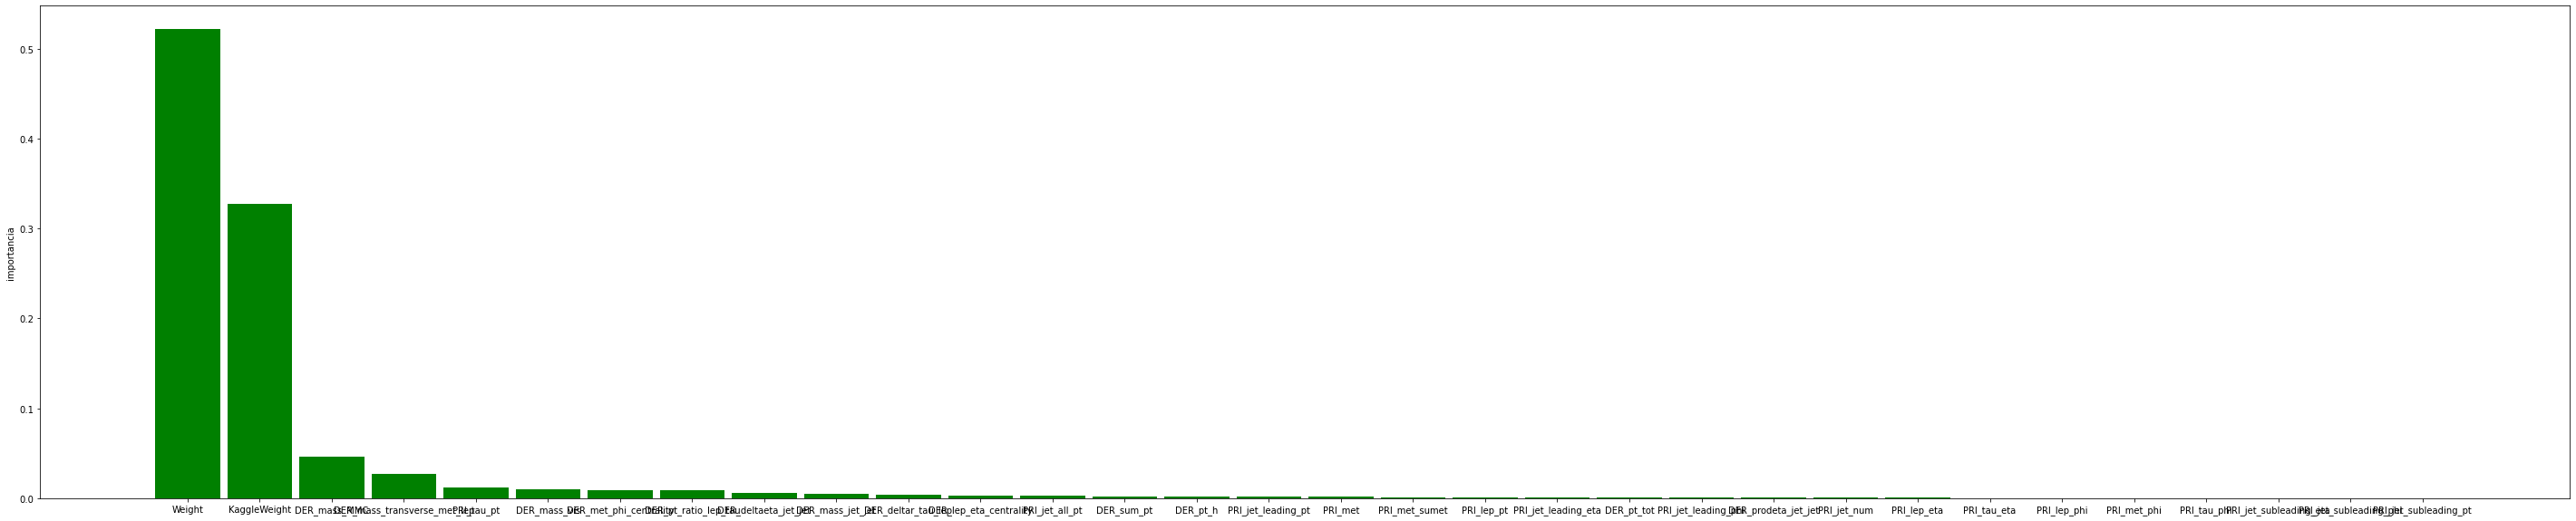

In [65]:

fig = plt.figure(figsize = (50, 10))
 
# creating the bar plot
plt.ylabel("importancia")
plt.bar(x, y, color ='green',
        width = 0.9)

In [147]:
# Imprime los nombres de las características más importantes
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

Weight
KaggleWeight


In [148]:
# Transforme los datos para crear un nuevo conjunto de datos que contenga solo las características más importantes
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [149]:
# Cree un nuevo clasificador de bosque aleatorio para las características más importantes
rf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Entrene al nuevo clasificador en el nuevo conjunto de datos que contiene las características más importantes
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [150]:
from sklearn.metrics import accuracy_score
# Aplicar el clasificador completo a los datos de prueba
y_pred = rf.predict(X_test)

# Ver la precisión de nuestro modelo de funciones completas (4 funciones)
accuracy_score(y_test, y_pred)

1.0

In [151]:
# Aplicar el clasificador completo a los datos de prueba
y_important_pred = rf_important.predict(X_important_test)

# Ver la precisión de nuestro modelo de funciones limitadas (2 funciones)
accuracy_score(y_test, y_important_pred)

1.0

In [152]:
y_important_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)